# Predict Cancer Death Rate by County

### Data Dictionary

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a) <br>
avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a) <br>
avgDeathsPerYear: Mean number of reported mortalities due to cancer(a) <br>
incidenceRate: Mean per capita (100,000) cancer diagoses(a) <br>
medianIncome: Median income per county (b) <br>
popEst2015: Population of county (b) <br>
povertyPercent: Percent of populace in poverty (b) <br>
studyPerCap: Per capita number of cancer-related clinical trials per county (a) <br>
binnedInc: Median income per capita binned by decile (b) <br>
MedianAge: Median age of county residents (b) <br>
MedianAgeMale: Median age of male county residents (b) <br>
MedianAgeFemale: Median age of female county residents (b) <br>
Geography: County name (b) <br>
AvgHouseholdSize: Mean household size of county (b) <br>
PercentMarried: Percent of county residents who are married (b) <br>
PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b) <br>
PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b) <br>
PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b) <br>
PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b) <br>
PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)<br>
PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree <br>
PctEmployed16_Over: Percent of county residents ages 16 and over employed (b) <br>
PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b) <br>
PctPrivateCoverage: Percent of county residents with private health coverage (b) <br>
PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance<br>
PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b) <br>
PctPublicCoverage: Percent of county residents with government-provided health coverage (b) <br>
PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b) <br>
PctWhite: Percent of county residents who identify as White (b) <br>
PctBlack: Percent of county residents who identify as Black (b) <br>
PctAsian: Percent of county residents who identify as Asian (b) <br>
PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b) <br>
PctMarriedHouseholds: Percent of married households (b) <br>
BirthRate: Number of live births relative to number of women in county (b) <br>
(a): years 2010-2016 <br>
(b): 2013 Census Estimates <br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")



## 1. Load data

In [4]:
df_cancer = pd.read_csv('cancer_reg.csv', encoding="ISO-8859-1")

## 2. Data Cleaning and Wrangling

### 2.1. Data Exploration

In [5]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
#Check the shape of the data
df_cancer.shape

(3047, 34)

In [7]:
#Check the data types
df_cancer.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

<AxesSubplot:>

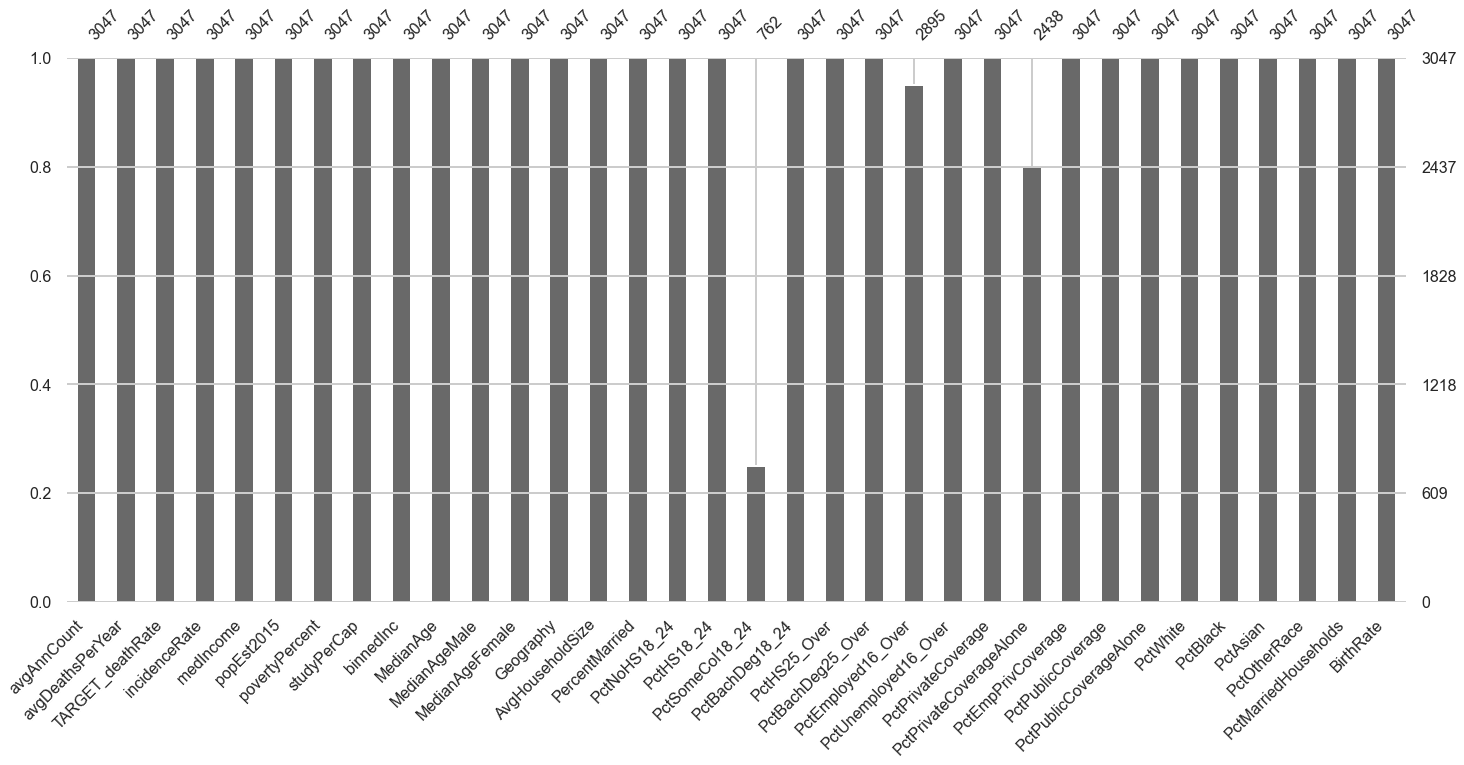

In [8]:
#Visualize missing values in the entire df
import missingno as msno
msno.bar(df_cancer)

In [9]:
#Percentage_of_missing_values
df_cancer.isnull().mean()*100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

Only 3 columns have missing values. One column ('PctSomeCol18_24') have more than 70% missing values. We can drop this column. The other two columns have less than 20% missing values. We can impute these columns later.


### 2.2  Data Cleaning

In [10]:
#Rename dependent column
df_cancer.rename(columns = {'TARGET_deathRate':'Deathrate'}, inplace=True)

In [11]:
#drop column 'PctSomeCol18_24' with 75% missing values
df_cancer.drop('PctSomeCol18_24', axis=1, inplace=True)

In [12]:
#We can look at the non-numeric and check the values. 
obj_df = df_cancer.select_dtypes(include=['object'])
obj_df.head()

,binnedInc,Geography
0,"(61494.5, 125635]","Kitsap County, Washington"
1,"(48021.6, 51046.4]","Kittitas County, Washington"
2,"(48021.6, 51046.4]","Klickitat County, Washington"
3,"(42724.4, 45201]","Lewis County, Washington"
4,"(48021.6, 51046.4]","Lincoln County, Washington"


We can check the unique values for each categorical column

The 'binnedInc' column contains the median income per capita binned by decile. We can change to a numerical variable by using ordinal encoding. We can encode after training-test split.

In [13]:
# check the unique values for 'binnedInc'
df_cancer['binnedInc'].unique()

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [14]:
bins = df_cancer['binnedInc'].unique()
bins = np.sort(bins)
bins

array(['(34218.1, 37413.8]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]',
       '(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]',
       '[22640, 34218.1]'], dtype=object)

In [15]:
#Create coded bin dictionary for renaming
bins_dict = {'[22640, 34218.1]': 'a',
             '(34218.1, 37413.8]': 'b',
             '(37413.8, 40362.7]': 'c',
             '(40362.7, 42724.4]': 'd',
             '(42724.4, 45201]': 'e',
             '(45201, 48021.6]': 'f',
             '(48021.6, 51046.4]': 'g',
             '(51046.4, 54545.6]': 'h',
             '(54545.6, 61494.5]': 'i',
             '(61494.5, 125635]': 'j',          
}

In [16]:
#replace bins with alphabet codes
df_cancer['binnedInc'] = df_cancer['binnedInc'].replace(bins_dict)

In [17]:
#check unique values in column
df_cancer['binnedInc'].unique()

array(['j', 'g', 'e', 'h', 'c', 'd', 'i', 'b', 'a', 'f'], dtype=object)

In [18]:
#change dtype to category
df_cancer['binnedInc'] = df_cancer['binnedInc'].astype('category')

In [19]:
#order list of bin codes
bin_sorted = np.sort(df_cancer['binnedInc'].unique())
cat_bins = [bin_sorted]

In [20]:
cat_bins

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype=object)]

In [21]:
# check the unique values for 'Geography'
lst = df_cancer['Geography'].unique()

for i in lst:
    print(i)

Kitsap County, Washington
Kittitas County, Washington
Klickitat County, Washington
Lewis County, Washington
Lincoln County, Washington
Mason County, Washington
Okanogan County, Washington
Pacific County, Washington
Pend Oreille County, Washington
Pierce County, Washington
San Juan County, Washington
Skagit County, Washington
Skamania County, Washington
Snohomish County, Washington
Spokane County, Washington
Stevens County, Washington
Thurston County, Washington
Wahkiakum County, Washington
Walla Walla County, Washington
Whatcom County, Washington
Whitman County, Washington
Yakima County, Washington
Barbour County, West Virginia
Berkeley County, West Virginia
Boone County, West Virginia
Braxton County, West Virginia
Brooke County, West Virginia
Cabell County, West Virginia
Calhoun County, West Virginia
Clay County, West Virginia
Doddridge County, West Virginia
Fayette County, West Virginia
Gilmer County, West Virginia
Grant County, West Virginia
Greenbrier County, West Virginia
Hampshir

Goliad County, Texas
Gonzales County, Texas
Gray County, Texas
Grayson County, Texas
Gregg County, Texas
Grimes County, Texas
Guadalupe County, Texas
Hale County, Texas
Hall County, Texas
Hamilton County, Texas
Hansford County, Texas
Hardeman County, Texas
Hardin County, Texas
Harris County, Texas
Harrison County, Texas
Hartley County, Texas
Haskell County, Texas
Hays County, Texas
Hemphill County, Texas
Henderson County, Texas
Hidalgo County, Texas
Hill County, Texas
Hockley County, Texas
Hood County, Texas
Hopkins County, Texas
Houston County, Texas
Howard County, Texas
Hudspeth County, Texas
Hunt County, Texas
Hutchinson County, Texas
Irion County, Texas
Jack County, Texas
Jackson County, Texas
Jasper County, Texas
Jeff Davis County, Texas
Jefferson County, Texas
Jim Hogg County, Texas
Jim Wells County, Texas
Johnson County, Texas
Jones County, Texas
Karnes County, Texas
Kendall County, Texas
Kerr County, Texas
Kimble County, Texas
Kinney County, Texas
Kleberg County, Texas
Knox Cou

In [22]:
#How many unique values are in the data
print(len(lst))

3047


In [23]:
# extract 'State' name from Geography
df_cancer['State'] = df_cancer['Geography'].str.split(', ').str[-1]

In [24]:
#Print states
statelist = df_cancer['State'].unique()

for i in statelist:
    print(i)

Washington
West Virginia
Wisconsin
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
Virginia
Michigan
Minnesota
North Carolina
North Dakota
Alabama
Arkansas
California
Montana
Tennessee
Texas
Louisiana
Maine
Maryland
Massachusetts
Utah
Vermont
Colorado
Wyoming
Mississippi
Missouri
Kansas
Kentucky
Connecticut
Delaware
District of Columbia
Florida
Oklahoma
Oregon
Ohio
Pennsylvania
Rhode Island
South Carolina
Indiana
Iowa
Georgia
Hawaii
Idaho
Illinois
Alaska
Arizona
South Dakota


Now wehave a new State column. We will use this for EDA. We can rename 'Geography' to 'County'

In [25]:
#Rename 'Geography' to 'County' column
df_cancer.rename(columns = {'Geography':'County'}, inplace=True)

Let's look at the df_cancer after cleaning

In [26]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,Deathrate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,County,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,j,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,g,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,g,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,e,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,g,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,Washington


We want the lists of numerical and non-numerical columns in separate lists for the preprocess pipeline.

In [27]:
#list of non-numerical columns
cat_list = ['County', 'State', 'binnedInc']

In [28]:
#list of numerical columns
num_list = list(df_cancer.drop(columns=cat_list).drop(columns='Deathrate'))
print(num_list)

['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [29]:
#list of category type columns
blist = ['binnedInc']

In [33]:
#Save dataframe to file
pd.DataFrame(df_cancer).to_csv('df_cancer.csv', index=False)

In [31]:
df_cancer.shape

(3047, 34)

In [32]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,Deathrate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,County,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,j,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,g,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,g,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,e,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,g,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,Washington
